In [1]:
from raster_dataset import GDALRasterDataSet
from kedro.extras.datasets.geopandas import GeoJSONDataSet
from pathlib import PurePath

from rasterio.plot import show

# Example of use cases for GDALRasterDataSet

## First, we need a vector dataset. We will use the dataset of the counties of Goiás - Brazil

In [2]:
geodataset = GeoJSONDataSet(
    "../../../../../kedro/tests/extras/datasets/rasterio/data/GO_Municipios_2020.geojson"
)

In [3]:
gdf = geodataset.load()
gdf.crs = "epsg:4326"

/var/home/yurideabreu/anaconda3/envs/mapOsiris/lib/python3.8/site-packages/geopandas/_vectorized.py:142: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


## Each of these is a kind of geometry that the class will accept

In [4]:
test_gdf = gdf[gdf["CD_MUN"] == '5205802']
test_gsr = test_gdf.geometry
test_shapely = test_gsr.iloc[0]
test_wkt = test_shapely.wkt

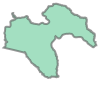

In [15]:
test_shapely

In [5]:
path = PurePath("s3://sentinel-cogs/sentinel-s2-l2a-cogs/22/L/GH/2022/1/S2A_22LGH_20220102_0_L2A/TCI.tif")

'sentinel-cogs/sentinel-s2-l2a-cogs/22/L/GH/2022/1/S2A_22LGH_20220102_0_L2A/TCI.tif'

## The dataset is loaded. The load method without arguments passes the whole raster

In [6]:
raster_dataset = GDALRasterDataSet("s3://sentinel-cogs/sentinel-s2-l2a-cogs/22/L/GH/2022/3/S2A_22LGH_20220323_0_L2A/TCI.tif")

In [7]:
raster = raster_dataset.load()

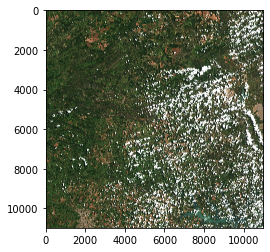

In [14]:
show(raster["array"])

## But you can also pass a geometry and the parameters

envelope = True means that the image will not be burned with the raster, but just the envelope (the square box that fits the geometry)

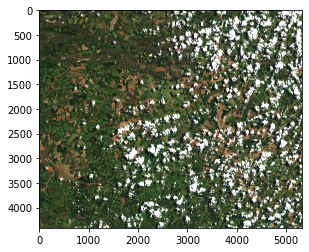

In [9]:
raster_gdf = raster_dataset.load(geometry=test_gdf, envelope = True)
show(raster_gdf["array"])

## This is what happens when you ask to burn the region using envelope = False
## Testing now with a GeoDataFrame

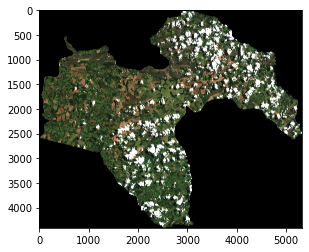

In [10]:
raster_gdf = raster_dataset.load(geometry=test_gdf, envelope = False)
show(raster_gdf["array"])

## Now with a GeoSeries

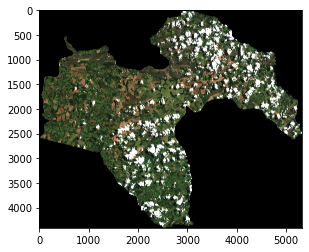

In [11]:
raster_gsr = raster_dataset.load(geometry=test_gsr, envelope = False)
show(raster_gsr["array"])

## With a shapely polygon

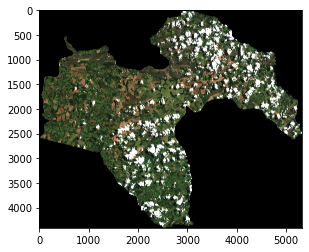

In [12]:
raster_shapely = raster_dataset.load(geometry=test_shapely, geometry_crs="epsg:4326", envelope = False)
show(raster_shapely["array"])

## With a WKT String

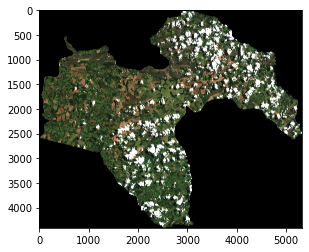

In [13]:
raster_wkt = raster_dataset.load(geometry=test_wkt, geometry_crs="epsg:4326", envelope = False)
show(raster_wkt["array"])